# Methoden en Technieken -- Blok 1

## Datapunt Opdracht

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- A2: Je stelt voor een AI-oplossing juridische, ethische, organisatorische, **functionele en technische requirements** op.
- B1: Je **verkent en prepareert een dataset voor het trainen en testen van een AI-model** en
kan de voor- en nadelen van het gebruik van een bestaande dataset onderbouwen, rekening
houdend met technische en ethische randvoorwaarden.
- B2: Je **stelt op basis van requirements en data een geschikte architectuur voor een AI-oplossing op en selecteert daarvoor passende AI-technieken gebruik makend van bijvoorbeeld machine learning, deep learning**, kennisrepresentatie, computer vision en natural language
processing.
- B3: Je **ontwikkelt een nieuw** of voorgetraind **AI-model** volgens een iteratief en systematisch
proces.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria die in het vakgebied erkend worden** zoals robustness, **performance**, scalability,
explainability, **model complexity** en resource demand.

Dit is een individuele opdracht. Het is toegestaan met elkaar de opdracht te bespreken, maar iedereen schrijft zijn eigen code en antwoorden. Mocht je code van het internet hebben overgenomen/aangepast, vermeld dan de bron in het commentaar. Het gebruik van generatieve AI (Chat-GPT, etc...) is *alleen* toegestaan bij de voorbereiding op de opdracht. Denk hierbj aan activiteiten zoals brainstormen, of het maken van een plan. Het is niet toegestaan code of tekst van generative AI over te nemen. (Level 2 van de AI Assessment Scale)


Dit volgende code leest de data in, het bestand **Visegrad2020.csv** is samen met deze opdracht te vinden op DLO.

In [2]:
import pandas as pd

data = pd.read_csv('Visegrad2020.csv', index_col=0)

In deze opdracht ga je een model maken om de sector (kolom $S$, 6 klassen) te voorspellen a.d.h.v. de verklarende variabelen $X_1$ t/m $X_{82}$. Doel is hier niet om een interpreteerbaar model te maken, maar mocht je geïnteresseerd zijn in de herkomst van de data en de betekenis van de variabelen dan is dit te vinden op [https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2](https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2).

Het doel van deze opdracht is niet zo zeer om een zo goed mogelijk model op te leveren, maar te laten zien dat je al je keuzes in de modellering en evaluatie kan toelichten, verantwoorden, en correct kan toepassen.

### De opdracht

#### Deel A

Verken de data, en voer eventuele datapreparatie uit, leg kort uit wat je opvalt.

> Jouw antwoord hier

Ten eerste wil ik weten in wat voor format mijn data opgeslagen is

In [6]:
type(data)

pandas.core.frame.DataFrame

Vervolgens ga ik kijken naar een samenvatting van de dataset om te zien of iets me opvalt

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 73 to 388
Data columns (total 83 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      133 non-null    float64
 1   X2      133 non-null    float64
 2   X3      133 non-null    float64
 3   X4      133 non-null    float64
 4   X5      133 non-null    float64
 5   X6      133 non-null    float64
 6   X7      133 non-null    float64
 7   X8      133 non-null    float64
 8   X9      133 non-null    float64
 9   X10     133 non-null    float64
 10  X11     133 non-null    float64
 11  X12     133 non-null    float64
 12  X13     133 non-null    float64
 13  X14     133 non-null    float64
 14  X15     133 non-null    float64
 15  X16     133 non-null    float64
 16  X17     133 non-null    float64
 17  X18     133 non-null    float64
 18  X19     133 non-null    float64
 19  X20     133 non-null    float64
 20  X21     133 non-null    float64
 21  X22     133 non-null    float64
 22  X23   

Het is vreemd dat er 133 waarden zijn maar de waardes lopen van 73 tot 388, ik zou zelf verwachten dat de waarden zouden lopen van 0 tot 132. Verder zie ik niets opvallends aan de data. Geen missing values, en alles staat al netjes in numeric values (float, int) wat mooi samengaat met machine learning

Vervolgens run ik ook `.describe()` en `.hist()` om mijn dataset beter te begrijpen.

In [ ]:
#df.describe()
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
count,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,-2.399918e-18,0.570075,0.110602,1.970000,-0.487519,0.07015,1.221278,1.137820,0.382331,0.051579,...,1.006391,1.088195,0.452180,0.893534,1.335639,1.260301,1.127594,0.944211,3.251880,3.406015
std,3.261599e-01,0.434348,0.434223,2.468709,4.252167,0.33446,1.715741,1.173967,0.424705,0.118902,...,0.704431,0.968777,4.624748,99.199967,4.115192,2.214807,1.647358,13.851677,14.918643,1.297069
min,-3.460000e+00,0.000000,-2.960000,0.000000,-47.950000,-0.55000,-0.720000,0.000000,-2.570000,-0.550000,...,0.000000,0.000000,-40.770000,-778.700000,0.000000,0.000000,0.000000,-43.810000,-30.500000,1.000000
25%,0.000000e+00,0.350000,0.020000,1.060000,-0.070000,0.00000,0.420000,0.360000,0.290000,0.000000,...,0.900000,0.830000,0.020000,0.000000,0.730000,0.740000,0.720000,-0.270000,-0.780000,3.000000
50%,3.000000e-02,0.510000,0.150000,1.400000,0.040000,0.05000,0.830000,0.920000,0.450000,0.060000,...,1.020000,1.020000,0.850000,2.960000,0.950000,1.000000,0.970000,0.220000,0.000000,3.000000
75%,7.000000e-02,0.660000,0.310000,2.160000,0.140000,0.10000,1.570000,1.490000,0.610000,0.110000,...,1.110000,1.190000,1.400000,5.980000,1.160000,1.170000,1.210000,1.440000,1.870000,4.000000
max,5.700000e-01,3.570000,0.870000,17.920000,0.600000,3.65000,14.830000,8.370000,0.940000,0.340000,...,6.070000,8.530000,17.790000,366.330000,47.610000,19.000000,17.570000,133.100000,88.110000,6.000000


Het valt me op dat het moeilijk is om hier snel informatie uit te halen aangezien het zoveel features zijn

C:\Users\thezo\AppData\Local\Temp\ipykernel_14204\4222282729.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>, <Axes: title={'center': 'X13'}>,
        <Axes: title={'center': 'X14'}>, <Axes: title={'center': 'X15'}>,
        <Axes: title={'center': 'X16'}>, <Axes: title={'center': 'X17'}>,
        <Axes: title={'center': 'X18'}>],
       [<Axes: title={'center': 'X19'}>, <Axes: title={'center': 'X20'}>,
        <Axes: title={'center': 'X21'}>, <Axes: title={'center': 'X22'}>,
        <Axes: title={'center': 'X23'}>, <Axes: title={'center': 'X24'}>,
        <Axes: title={'center': 'X25'}>, <Axes: title={'center': 'X26'}>,
        <Axes: title={'center': 'X27'

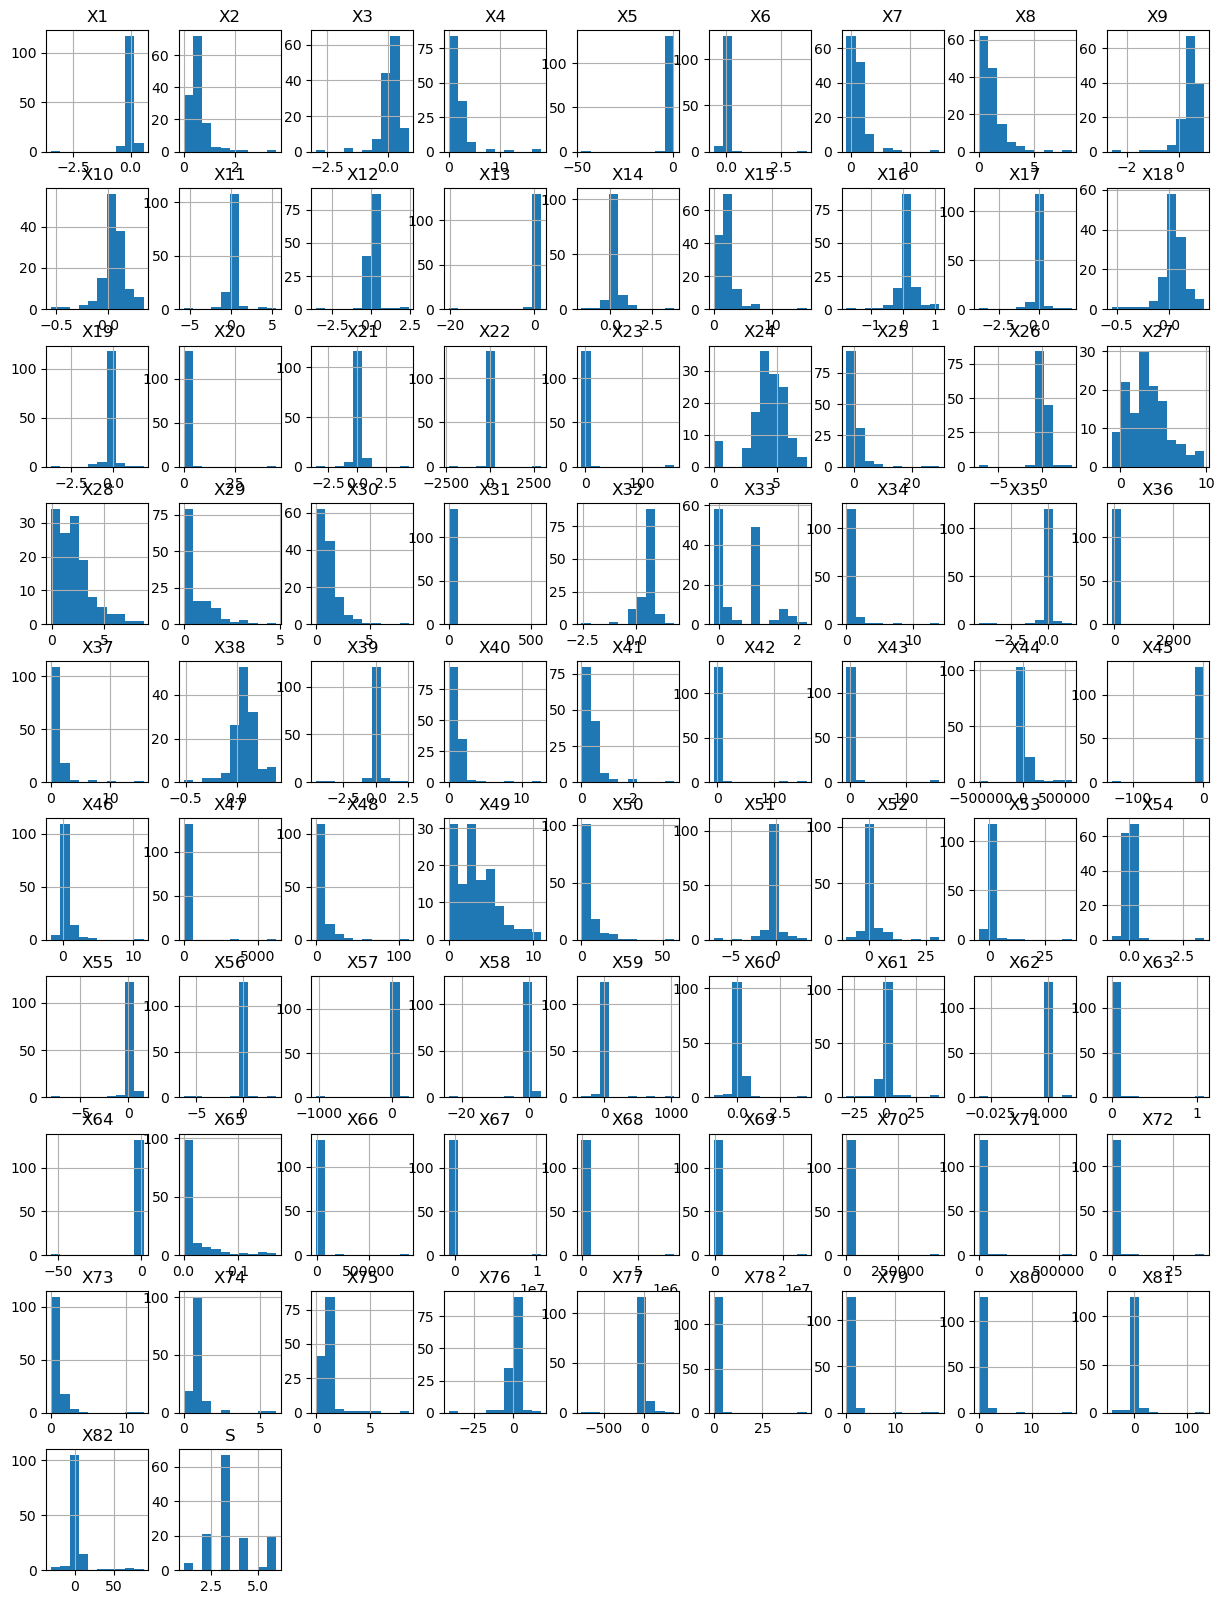

In [ ]:
# df.hist()
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

# Source: https://stackoverflow.com/questions/43392588/how-to-change-the-figure-size-of-dataframe-hist-for-pandas-0-11-0

Het valt op dat er meerdere variabelen zijn met verre uitschieters.

Voordat ik enige data preperation ga toepassen wil ik eerst het probleem dat ik oplos beter begrijpen dus laat ik dat nog even links liggen. 

#### Deel B

Wat zou je als nulmodel kiezen en waarom? Welke prestatiemaat gebruik je om je modellen te beoordelen, waarom? Hoe scoort je nulmodel op deze prestatiemaat?

Houd je antwoord kort en bondig.

> Jouw antwoord hier

Ten eerste gaan we kijken naar de variabel die we gaan voorspellen, variabel S.

In [17]:
col_S = data.iloc[:,-1:]
col_S.describe()
# Source: https://stackoverflow.com/questions/40144769/how-to-select-the-last-column-of-dataframe

,S
count,133.000000
mean,3.406015
std,1.297069
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,6.000000


Om een nulmodel te maken willen we weten welke klasse als vaakst voorkomt in variabel S. Door het nulmodel de vaakst voorkomende klasse te laten voorspellen, kunnen we de hoogste mogelijk accuracy halen die een nulmodel kan behalen.

In [ ]:
col_S.value_counts()
#Source: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

S
3    67
2    21
6    20
4    19
1     4
5     2
Name: count, dtype: int64

Klasse `3` komt veruit het vaakst voor. als het nulmodel klasse 3 zou voorspellen betekent dat, dat het nulmodel een gemiddelde accuracy zou hebben van 

`67 / (67+21+20+19+4+2) * 100 = 50,375...% ~ 50,38%`

#### Deel C

Stel, onder andere aan de hand van je antwoorden in deel A en B, een korte lijst van *requirements* op. Waar moet je model minimaal aan voldoen. Licht gemaakte keuzes kort en bondig toe.

> Jouw antwoord hier

### Functionele
- Het model moet variabel S voorspellen (aan de hand van de X variabelen)

### Technische
- Het model moet een minimale accuracy hebben van > 50,38% (anders is het nulmodel beter).

#### Deel D

Kies een model dat je wilt gebruiken. Zie https://scikit-learn.org/stable/supervised_learning.html voor een overzicht van beschikbare modellen in **sklearn**. 

Licht kort toe welk model je hebt gekozen en waarom, welke hyperparameterkeuzes voor dit model van belang zijn, wat geschikte waardes voor deze hyperparameters zijn en/of wat de gebruikelijke methodes zijn om deze parameters te tunen.

**Opmerking:** Het gaat hier voornamelijk om je argumentatie en correct gebruik van technieken, het is niet de bedoeling dat je eindeloos lang door blijft modelleren om het *beste* model te vinden.

> Jouw antwoord hier

De belangrijkste factor in deze case is het feit dat we te maken hebben met een classificatie probleem. Dat houdt in dat we een model/algoritme moeten kiezen dat geschikt is voor classificatie.

ik ga `Nearest Neighbors Classification` gebruiken voor dit classificatie probleem omdat het een model is dat een classificatie probleem kan oplossen. Ik heb geen verdere beargumentering, buiten het feit dat ik de naam ooit eerder heb gehoord en het in de klas heb gezien.

`KNeighborsClassifier` heeft een aantal interessante parameters.
- `n_neighbors`: de aantal dichtsbijzijnde punten die invloed hebben op de uitkomst. Bijvoorbeeld, stel je wilt de class van een nieuwe input predicten, en `n_neighbors=5` dan kijken we naar de 5 dichtbijzijnde datapunten, stel dat 4 hiervan class 3 hebben en een hiervan class 1, dan gokt het model klass 3.
- `weights`: het gewicht van elke neighbor. Deze staat normaal gesproken op `uniform`, dat houdt in dat elke neighbor dezelfde waarde heeft. je kunt weights ook gelijkstellen aan `distance`, dan draait het puur om de afstanden van de neighbors tot aan het nieuwe data punt, niet meer persé de meerderheid van buren.  

### Sources
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- KNN explanation: https://www.youtube.com/shorts/eW17z4h4Bfc

#### Deel E

Fit je model en bepaal hyperparameterkeuzes.

> Jouw antwoord hier

Eerst ga ik een correlatie map maken om te kijken welke features interessant zijn om mee te nemen

<Axes: >

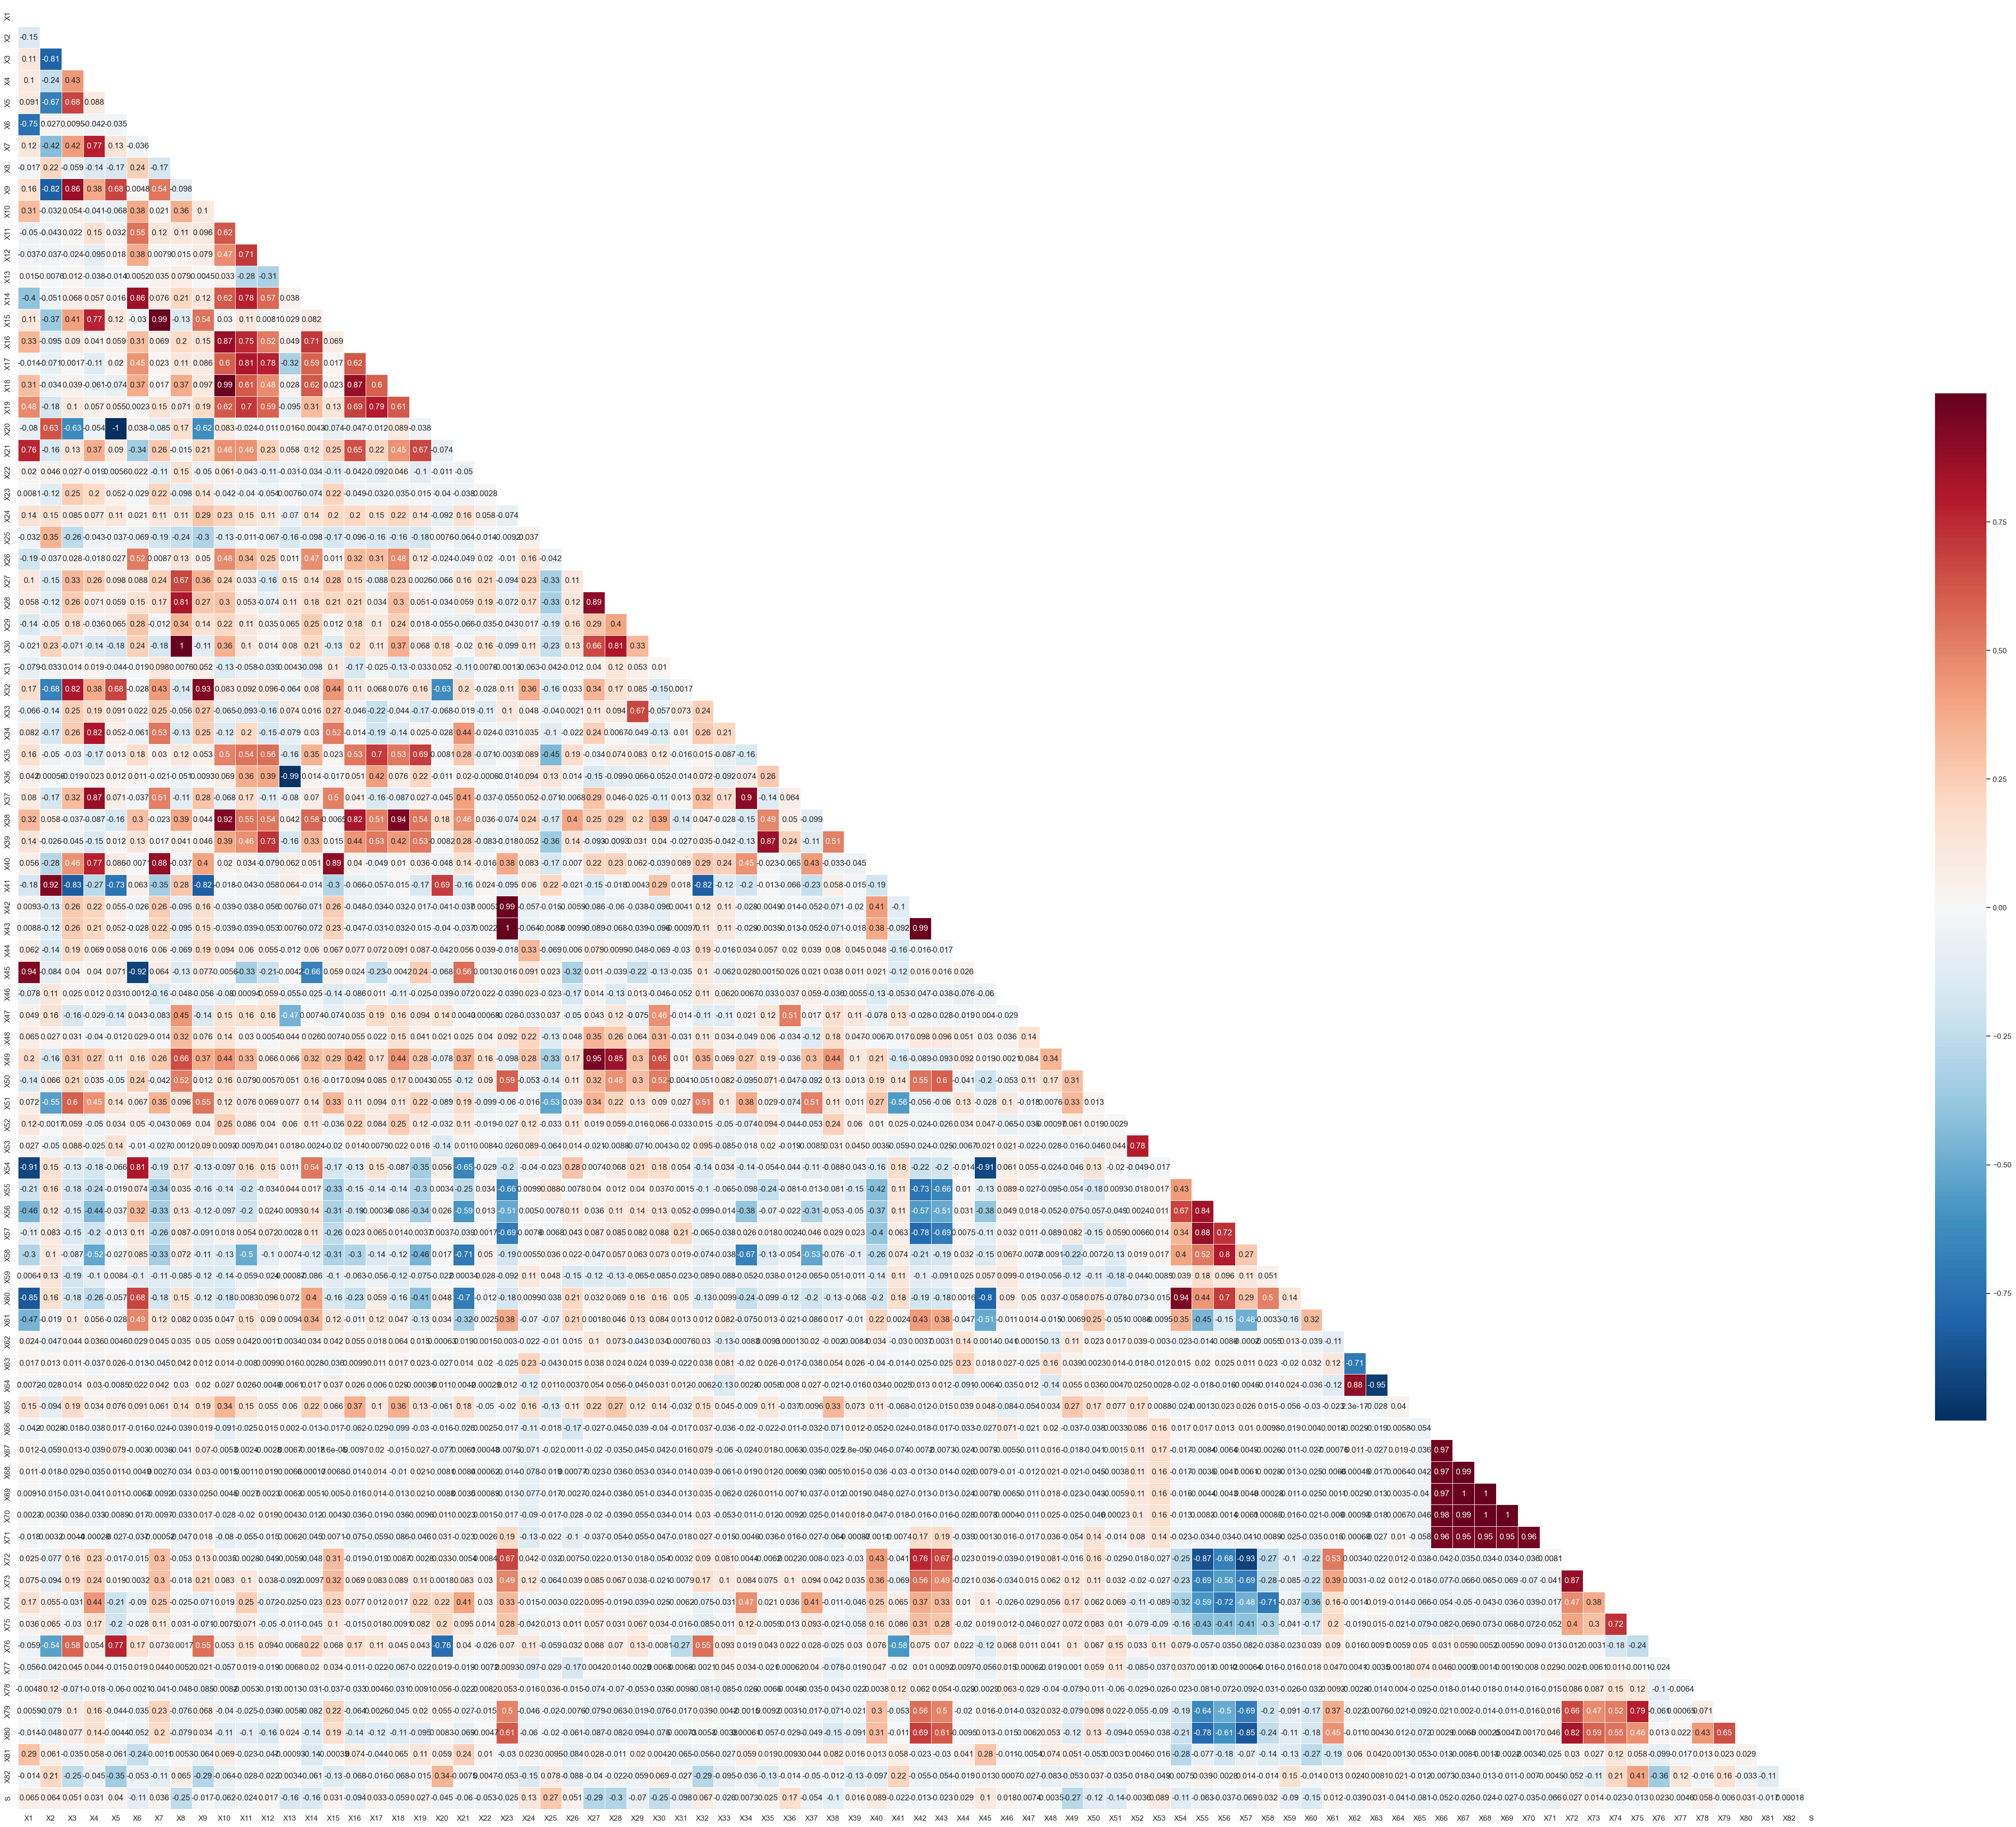

In [41]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
d = data

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 55))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu_r", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#Source: https://seaborn.pydata.org/archive/0.11/examples/many_pairwise_correlations.html

Er zijn niet echt correlaties tussen X variabelen en S. de hoogste correlatie is tussen S en X28 met waarde -0.3 maar dat is ook niet zo hoog. Voor het trainen neem ik de variabelen met een correlatie hoger dan 0.2 (absoluut) mee. dat zijn de variabelen: X8, X25, X27, X28, X30, X49

Accuracy: 0.48148148148148145
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.50      0.14      0.22         7
           3       0.62      0.67      0.65        15
           4       1.00      0.50      0.67         2
           6       0.25      0.33      0.29         3

    accuracy                           0.48        27
   macro avg       0.47      0.33      0.36        27
weighted avg       0.58      0.48      0.50        27



c:\Users\thezo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thezo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thezo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

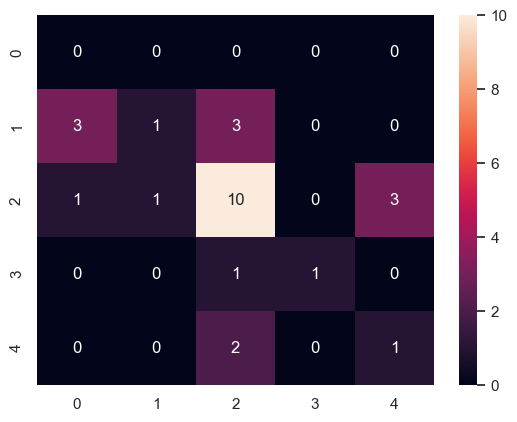

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
selected_features = ['X8', 'X25', 'X27', 'X28', 'X30', 'X49']
X = data[selected_features]
y = data['S']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the model
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
#Source: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn




from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
## Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Licht eventueel hyperparameterkeuzes kort verder toe.

> Jouw antwoord hier

Ik heb de parameters k=5 en weights=uniform gekozen. 

### k=5
k=5 is een oneven getal om zogeheten "ties" te voorkomen. k=5 is ook de default.

### Weights
deze heb ik ook maar op default gelaten (uniform).

Ik weet dat het mogelijk is om de grafiek te plotten van de features en zo te kijken naar de afstanden van de features en de vorm van de grafiek die de features volgen (ik denk dat deze features een dalparabool vormen). maar ik kan dit niet zonder AI generated code dus helaas. Ik neem aan dat je die grafiek dan zou kunnen gebruiken in het keuzeproces waarin je kiest welke model het beste is en welke parameters het meest geschiikt zijn

#### Deel F

Beoordeel je model. Bespreek de kwaliteit van je model, en licht gemaakte fouten van het model toe.

> Jouw antwoord hier

Mijn model is slechter dan mijn nul model, dat houdt in dat de kwaliteit erg laag is. Ik kan de gemaakte fouten van het model niet in detail toelichten. Maar fouten over het algemeen bij kNN worden veroorzaakt doordat de nearest neighbors niet overeenkomen met de daadwerkelijke klasse. De data had erg lage correlaties, dit kan betekenen dat de data erg gemixt is, waardoor de nearest neigbors allemaal door elkaar zitten. En als de neigbors door elkaar zitten gaan er verkeerde beslissingen gemaakt worden met kNN. 

Lang verhaal kort, kNN lijkt mij niet een goede algortime voor dit probleem